## BACKTESTING STRATEGIES

## 1. DCA simple (frecuencia semanal y mensual)

In [176]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from datetime import datetime, date, timedelta
import math
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()
sns.set_theme()

In [177]:
# Lectura de datos
start = datetime(1900,1,1)
end = datetime.now()
data = pdr.get_data_yahoo('BTC-USD', start, end, interval='d')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-11-10,68789.625000,63208.113281,66953.335938,64995.230469,4.873083e+10,64995.230469
2021-11-11,65579.015625,64180.488281,64978.890625,64949.960938,3.588063e+10,64949.960938
2021-11-12,65460.816406,62333.914062,64863.980469,64155.941406,3.608489e+10,64155.941406


In [178]:
# Crear variables y subset para análisis
df = data[['Adj Close']]['2021'].copy()
df = df.rename(columns={'Adj Close': 'btc_price'})
df['btc_return'] = df['btc_price'].pct_change()
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,btc_price,btc_return,day,weekday,month,year
Date,,,,,,
2021-01-01,29374.152344,NaN,1,4,1,2021
2021-01-02,32127.267578,0.093726,2,5,1,2021
2021-01-03,32782.023438,0.020380,3,6,1,2021
2021-01-04,31971.914062,-0.024712,4,0,1,2021
2021-01-05,33992.429688,0.063197,5,1,1,2021


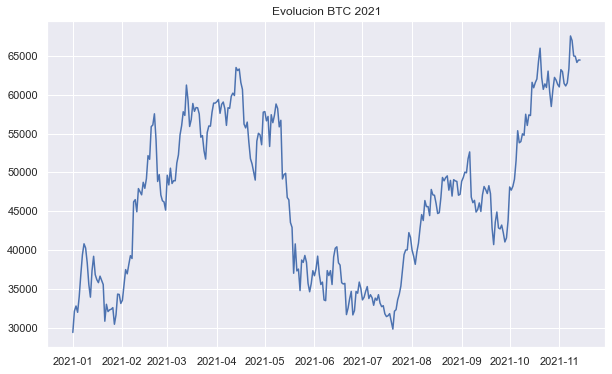

In [179]:
# Evolución BTC
plt.figure(figsize=(10,6))
plt.plot(df.index, df['btc_price'])
plt.title('Evolucion BTC 2021')
plt.grid(True)

## Weekly frequency

,total_usdt_invested,total_usdt_obtained,total_return
0,2250,3274.8,45.55
1,2250,3280.3,45.79
2,2250,3245.9,44.26
3,2250,3247.6,44.34
4,2300,3333.0,44.91
5,2300,3330.6,44.81
6,2300,3320.4,44.37


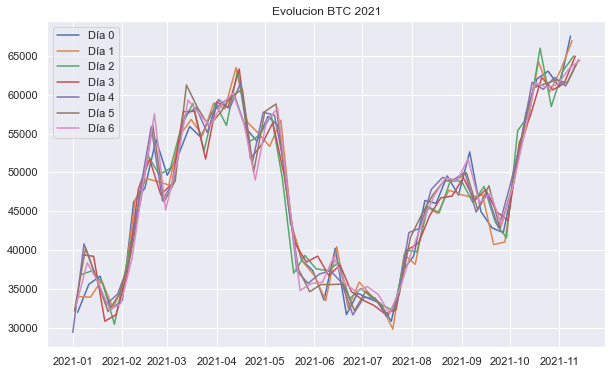

In [180]:
usdt = 50
initial_usdt = []
final_usdt = []
usdt_return = []
plt.figure(figsize=(10,6))


for i in range(7):
    df_sem = df[df['weekday']==i]
    df_sem['btc_return'] = df_sem['btc_price'].pct_change()
    df_sem['usdt_invested'] = usdt
    df_sem['btc_amount'] = df_sem['usdt_invested']/df_sem['btc_price']
    
   
    plt.title('Evolucion BTC 2021')
    plt.plot(df_sem.index, df_sem['btc_price'], label=f'Día {i}')
    plt.legend()
    
    #metrics
    total_btc_amount = df_sem['btc_amount'].sum()
    
    total_usdt_invested = df_sem['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
resultados = pd.concat([initial_usdt, final_usdt, usdt_return], axis=1)
resultados

    

## Monthly frequency

In [181]:
usdt = 200
initial_usdt = []
final_usdt = []
usdt_return = []
plt.figure(figsize=(20,10))


for i in range(31):
    df_mes = df[df['day']==i+1]
    df_mes['btc_return'] = df_mes['btc_price'].pct_change()
    df_mes['usdt_invested'] = usdt
    df_mes['btc_amount'] = df_mes['usdt_invested']/df_mes['btc_price']
    
   
    #plt.title('Evolucion compra mensual BTC 2021')
    #plt.plot(df_mes.index, df_mes['btc_price'], label=f'Día {i}')
    #plt.legend()
    
    #metrics
    total_btc_amount = df_mes['btc_amount'].sum()
    
    total_usdt_invested = df_mes['usdt_invested'].sum()
    initial_usdt.append(total_usdt_invested)
    
    total_usdt_obtained = round(total_btc_amount*data['Adj Close'][-1],3)
    final_usdt.append(round(total_usdt_obtained,1))

    total_return = (total_usdt_obtained/total_usdt_invested-1)*100
    usdt_return.append(round(total_return,2))

initial_usdt = pd.DataFrame(initial_usdt, columns=['total_usdt_invested'])
final_usdt = pd.DataFrame(final_usdt, columns=['total_usdt_obtained'])
usdt_return = pd.DataFrame(usdt_return, columns=['total_return'])
resultados_mes = pd.concat([initial_usdt, final_usdt, usdt_return], axis=1)
resultados_mes


,total_usdt_invested,total_usdt_obtained,total_return
0,2200,3325.5,51.16
1,2200,3263.6,48.34
2,2200,3210.3,45.92
3,2200,3248.8,47.67
4,2200,3194.2,45.19
5,2200,3116.9,41.68
6,2200,3138.5,42.66
7,2200,3063.4,39.24
8,2200,2985.4,35.70
9,2200,3039.6,38.16


<Figure size 1440x720 with 0 Axes>

día máximo: 24
retorno máximo: 53.11


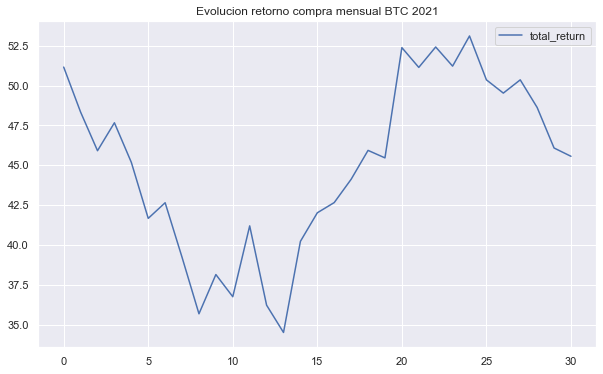

In [182]:
plt.figure(figsize=(10,6))
plt.title('Evolucion retorno compra mensual BTC 2021')
plt.plot(resultados_mes.index, resultados_mes['total_return'], label='total_return')
plt.legend()
dia_maximo = resultados_mes['total_return'].idxmax()
retorno_maximo = resultados_mes['total_return'].max()
print(f'día máximo: {dia_maximo}')
print(f'retorno máximo: {retorno_maximo}')